## Importing required libraries

In [132]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Importing data

In [134]:
data = pd.read_csv("C:/Users/Amrita/OneDrive/Desktop/bank_marketing.csv",delimiter = ";")
print(data.head())
print("length of the data is:", len(data))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
length of the data is: 45211


## EDA

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [136]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [137]:
data.rename(columns = {"y":"final outcome"},inplace = True)

In [138]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'final outcome'],
      dtype='object')

## Checking null values

In [139]:
data.isna().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
final outcome    0
dtype: int64

In [140]:
#There is no null values

## Visualizing correlation between features

In [142]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


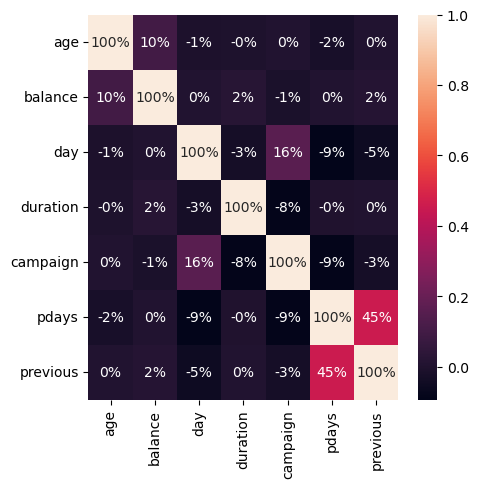

In [143]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(),annot = True, fmt = ".0%")
plt.show()

In [145]:
# There is no highly correlated features

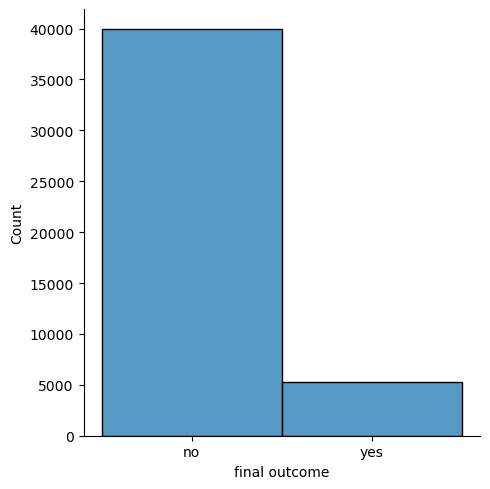

In [146]:
sns.displot(data["final outcome"], label = True)

## Outlier detection


In [148]:
# #Detecting outliers using z-score (no applicable here because the distribution of the variable is not normal)
# for column in data.columns:
#         if data[column].dtype == "int64":
#             z_scores = np.abs(stats.zscore(data[column]))
#             threshold = 2  # Adjust the threshold value based on your dataset
#             outliers = np.where(z_scores > threshold)
#             df = data.drop(outliers[0])
# len(df)

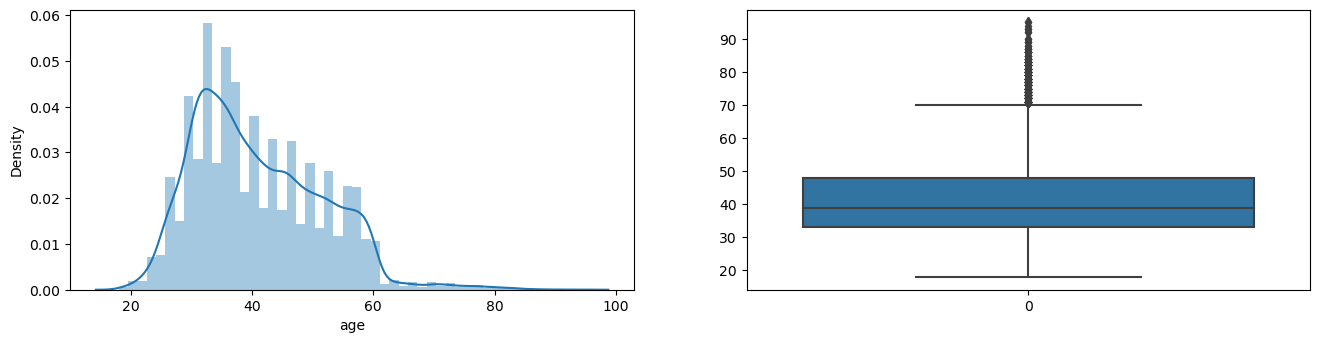

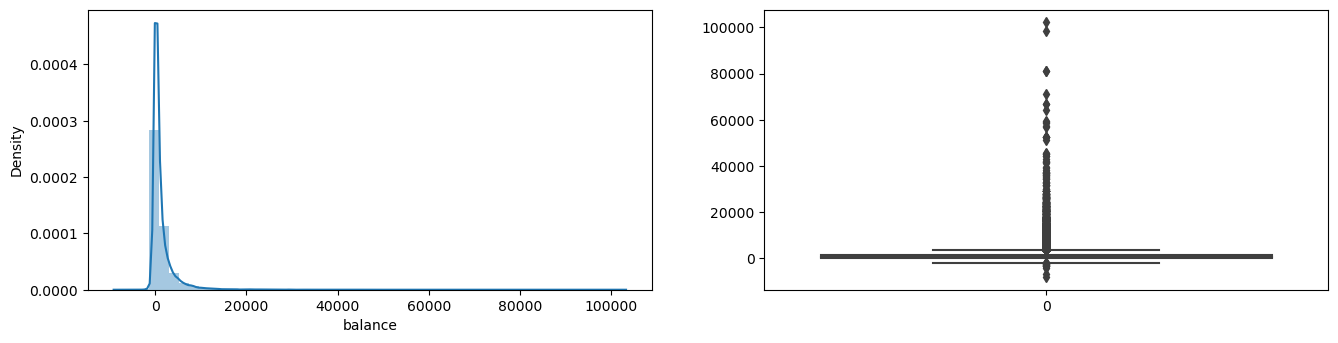

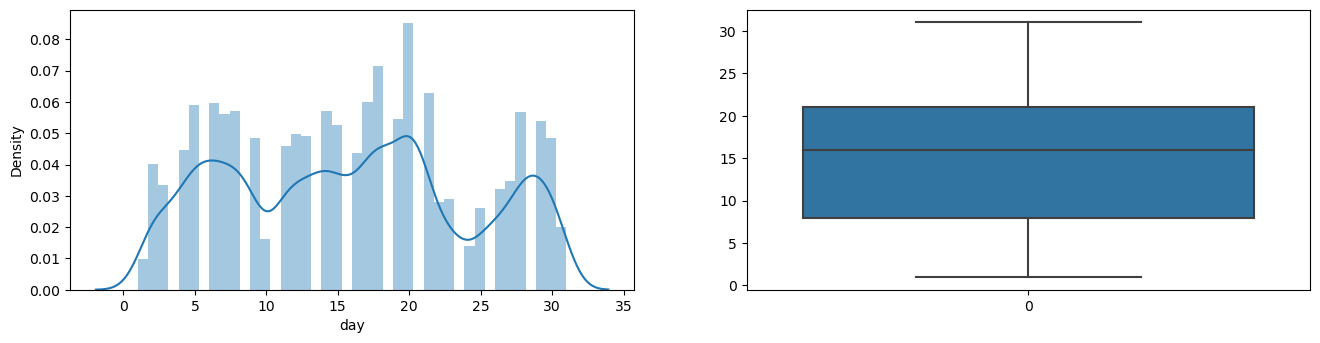

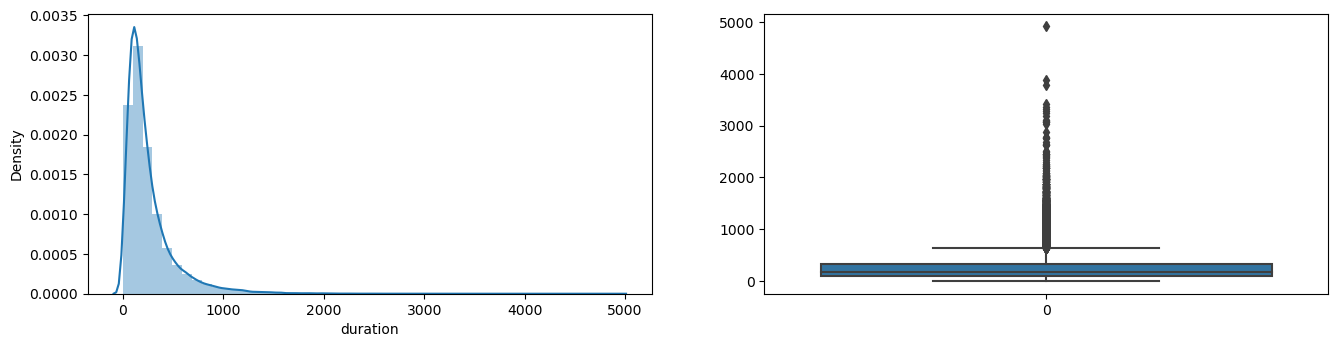

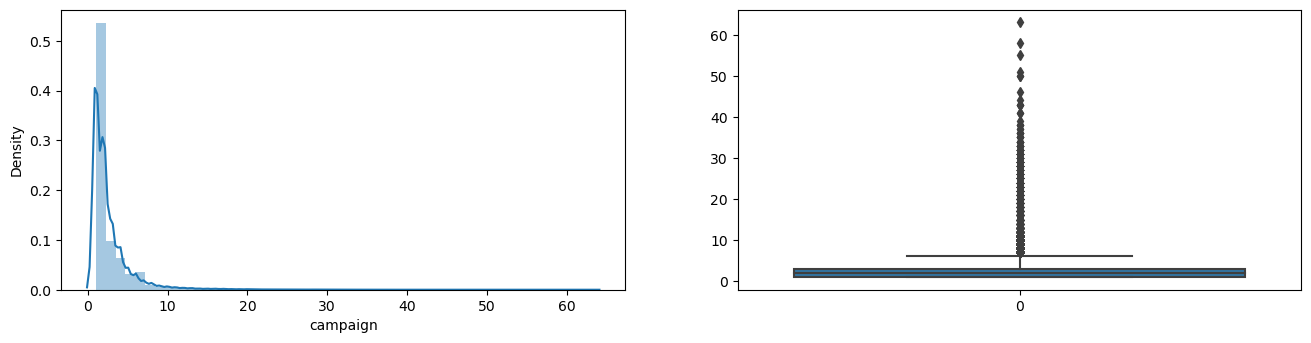

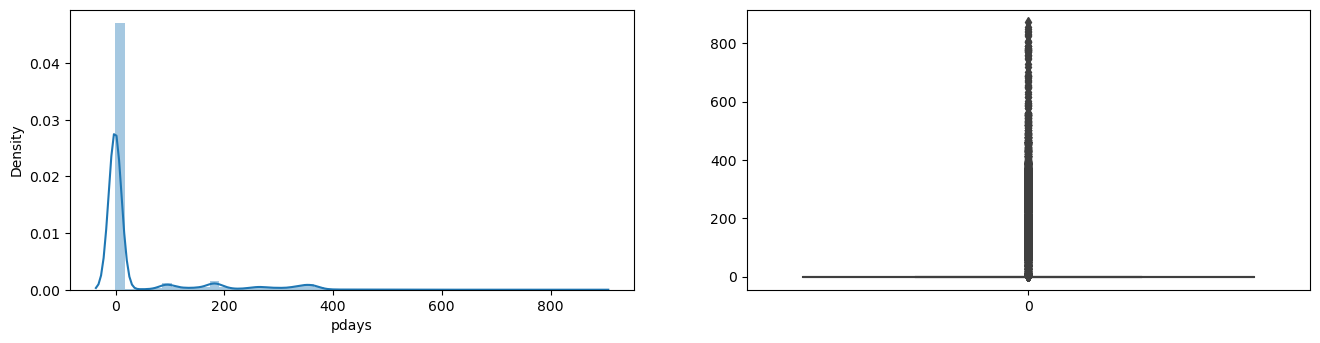

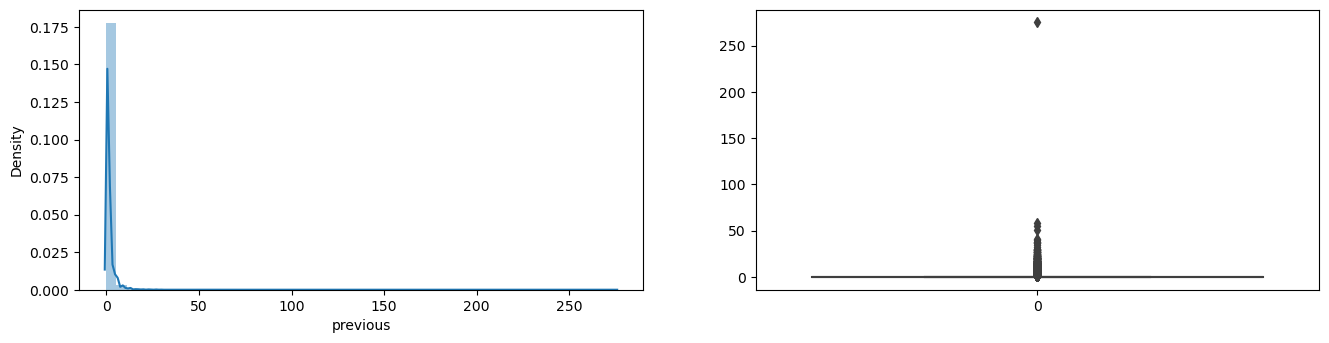

In [149]:
#before removing outliers
for column in data.columns:
        if data[column].dtype == "int64":
            plt.figure(figsize=(16,8))
            plt.subplot(2,2,1)
            sns.distplot(data[column])
            plt.subplot(2,2,2)
            sns.boxplot(data[column])

In [150]:
data.columns[:13]

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')

In [151]:
#removing outliers (using IQR)

for column in data.columns[:13]:
        if data[column].dtype == "int64":
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            data = data.drop(outliers.index)

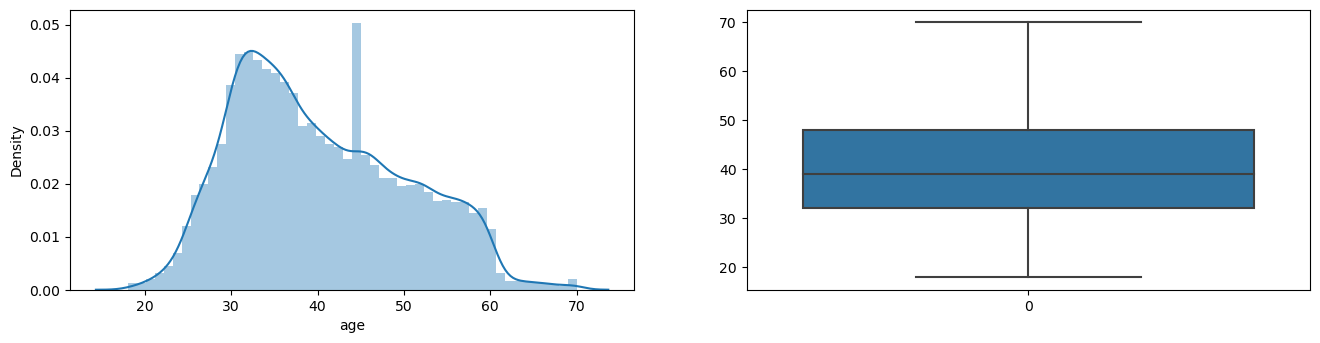

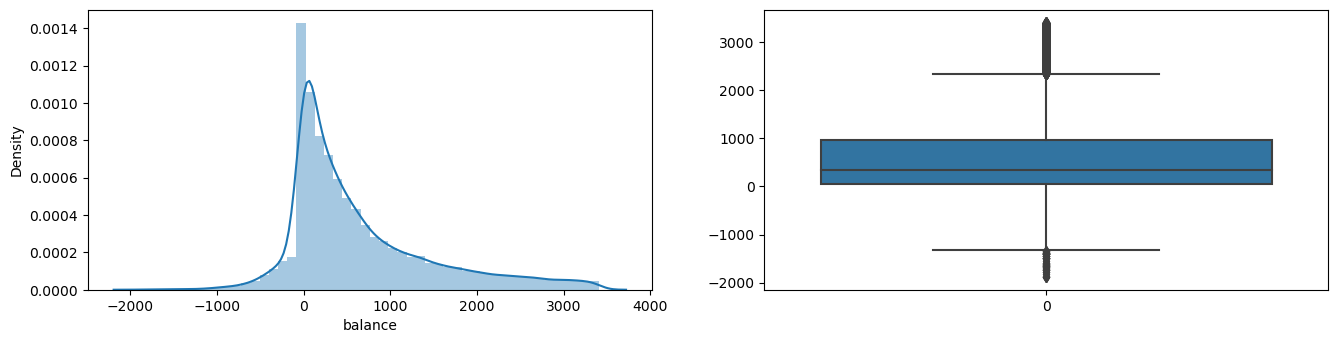

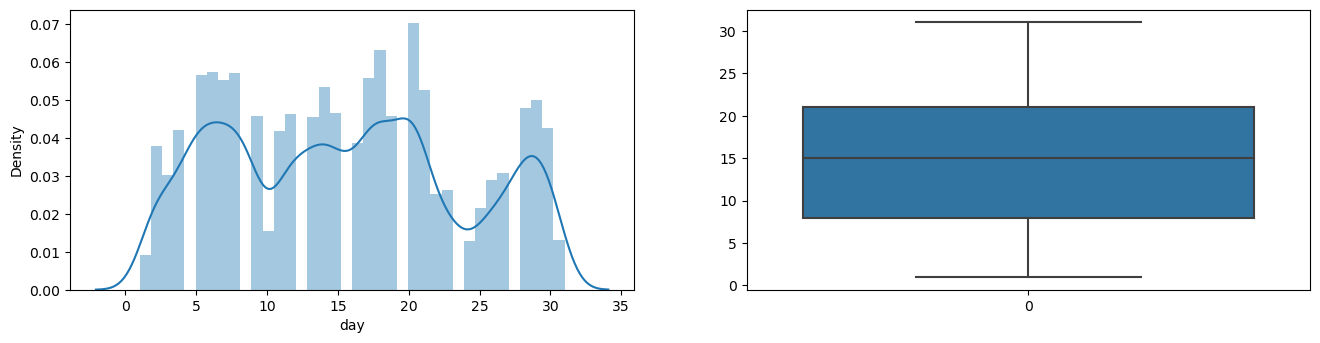

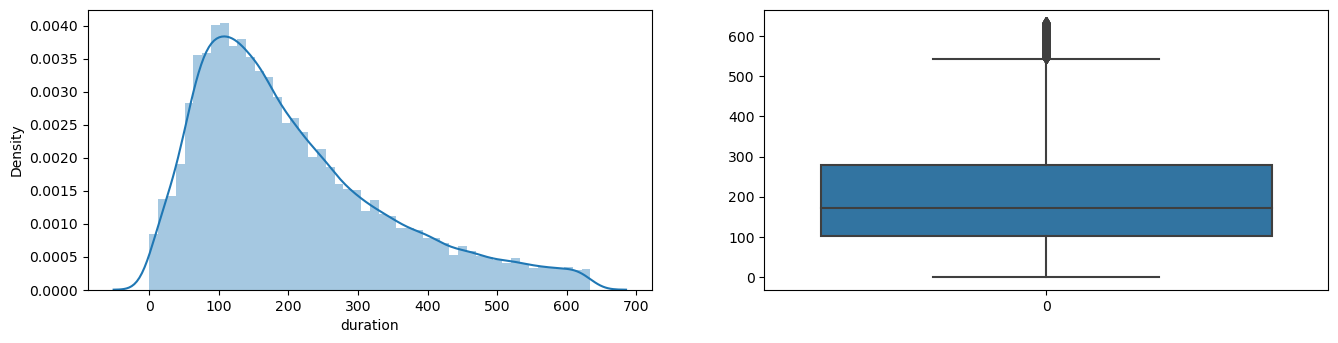

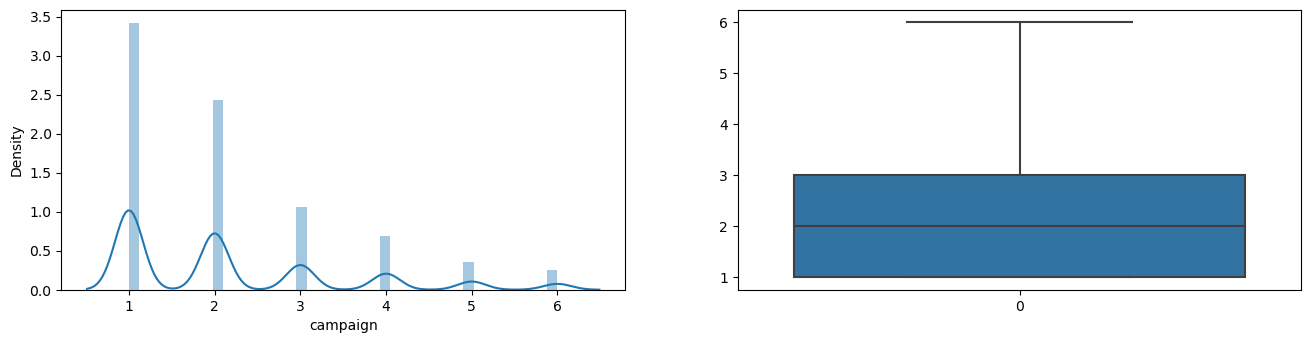

In [152]:
#after removing outliers
for column in data.columns[:13]:
        if data[column].dtype == "int64":
            plt.figure(figsize=(16,8))
            plt.subplot(2,2,1)
            sns.distplot(data[column])
            plt.subplot(2,2,2)
            sns.boxplot(data[column])

In [153]:
print("Length of the data after removing outliers: ",len(data))

Length of the data after removing outliers:  34563


## Printing all of the object data types and their unique values

In [154]:
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      7672
management       6966
technician       5862
admin.           4166
services         3324
retired          1388
self-employed    1173
entrepreneur     1142
unemployed        982
housemaid         929
student           761
unknown           198
Name: job, dtype: int64
_________________________________________________________________
marital : ['married' 'single' 'divorced']
married     20590
single       9951
divorced     4022
Name: marital, dtype: int64
_________________________________________________________________
education : ['tertiary' 'secondary' 'unknown' 'primary']
secondary    18295
tertiary      9777
primary       5137
unknown       1354
Name: education, dtype: int64
_________________________________________________________________
default : ['no' 'yes']
no     33889
yes      674
Name: default, dtype: 

In [155]:
# 0/1 = final outcome
# one hot encoding = job, marital, contact, poutcome
# label encoder = month,education,default, housing, loan


In [156]:
# Mapping the target variable to 0 and 1
data["final outcome"] = data["final outcome"].replace(['yes','no'],['1','0'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,final outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Encoding the non-numeric columns

In [157]:
## Transform non-numeric columns into numerical columns
# One-Hot Encoding and Label Encoding are both techniques used for converting categorical variables into a numerical representation. However, they differ in their approach and usage:

# 1. Label Encoding:
#    - Label Encoding assigns a unique numerical label to each unique category in a categorical variable.
#    - It replaces categorical values with integer labels, typically ranging from 0 to (number of categories - 1).
#    - Label Encoding is suitable for ordinal variables where the categories have an inherent order or rank.
#    - The encoded labels may introduce an arbitrary ordinal relationship between the categories that may mislead the model.
#    - Example: Label Encoding the categories "red," "green," and "blue" as 0, 1, and 2, respectively.

# 2. One-Hot Encoding:
#    - One-Hot Encoding creates binary columns for each category in a categorical variable.
#    - It represents each category as a binary vector (0 or 1) in a separate column.
#    - Each column represents one category, and only one of the columns is 1 for a particular instance.
#    - One-Hot Encoding is suitable for nominal variables where the categories do not have any inherent order.
#    - It avoids introducing arbitrary ordinal relationships between categories and prevents misinterpretation by the model.
#    - Example: One-Hot Encoding the categories "red," "green," and "blue" as three separate columns: [1, 0, 0], [0, 1, 0], and [0, 0, 1], respectively.

# When to use which one:
# - Label Encoding is typically used for ordinal variables where the order or rank of the categories is meaningful. For example, educational levels (high school, bachelor's degree, master's degree) or ratings (low, medium, high).
# - One-Hot Encoding is suitable for nominal variables where the categories have no inherent order or rank. It is commonly used when the presence or absence of a category is relevant to the problem. For example, colors (red, green, blue) or countries (USA, Canada, France).

# It's important to note that the choice between Label Encoding and One-Hot Encoding depends on the specific dataset, the nature of the categorical variable, and the machine learning algorithm being used. 
# Some algorithms can handle categorical variables directly, while others may require categorical variables to be converted into a numerical representation. 
#It's recommended to consider the characteristics of your data and the requirements of your machine learning model when deciding which encoding technique to use.

In [158]:
#Transform non-numeric columns into numerical columns
#One hot encoding

#encoded_data = pd.concat([df4,pd.get_dummies(df4[['job','marital','contact','poutcome']],prefix=[['job','marital','contact','poutcome']])],axis=1).drop([['job','marital','contact','poutcome']],axis=1)

one_hot_encoded_data = pd.get_dummies(data, columns = ['job','marital','contact','poutcome'])

In [159]:
one_hot_encoded_data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [160]:
one_hot_encoded_data.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'final outcome',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [161]:
data_encoded = pd.merge(data, one_hot_encoded_data, how = "inner")
print(data_encoded.columns)
data_encoded.drop(['job','marital','contact','poutcome'], axis=1, inplace=True)
print(data_encoded.columns)
print(len(data_encoded.columns))

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'final outcome', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'final outcome',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student

In [162]:
data_encoded.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [163]:
#Label encoding
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in data_encoded.columns:
        if data_encoded[column].dtype == np.number:
            continue
        data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column])

In [164]:
data_encoded.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,40,2,0,2960,1,0,4,8,261,0,...,0,1,0,0,0,1,0,0,0,1
1,26,1,0,882,1,0,4,8,151,0,...,0,0,1,0,0,1,0,0,0,1
2,15,1,0,855,1,1,4,8,76,0,...,0,1,0,0,0,1,0,0,0,1
3,29,3,0,2354,1,0,4,8,92,0,...,0,1,0,0,0,1,0,0,0,1
4,15,3,0,854,0,0,4,8,198,0,...,0,0,1,0,0,1,0,0,0,1


In [165]:
len(data_encoded)

34563

In [166]:
print(len(data_encoded.columns))

35


In [167]:
#Rearranging the columns
data_encoded = data_encoded[['final outcome','age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]

## Spliting the data into independent 'X' and dependent 'Y' variables

In [169]:
X = data_encoded.iloc[:, 1:data_encoded.shape[1]]
Y = data_encoded.iloc[:, 0]

## Nomalization and Standardization

In [170]:
# Normalization/ Min- Max scaling 
# Rescales values to a range between 0 and 1
# Useful when the distribution of the data is unknown or not Gaussian
# Sensitive to outliers
# Retains the shape of the original distribution
# Equation: (x – min)/(max – min)
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
X_norm = MinMaxScaler().fit_transform(X.values)
normed_features_df = pd.DataFrame(X_norm, index=X.index, columns=X.columns)

In [171]:
#Standardization (Not applicable here)
# Centers data around the mean and scales to a standard deviation of 1
# Useful when the distribution of the data is Gaussian or unknown
# Less sensitive to outliers
# Changes the shape of the original distribution
# Equation: (x – mean)/standard deviation
# scaled_features = StandardScaler().fit_transform(X.values)
# scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [172]:
normed_features_df

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.769231,0.666667,0.0,0.738892,1.0,0.0,0.133333,0.727273,0.411672,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.500000,0.333333,0.0,0.220170,1.0,0.0,0.133333,0.727273,0.238170,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.288462,0.333333,0.0,0.213430,1.0,1.0,0.133333,0.727273,0.119874,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.557692,1.000000,0.0,0.587619,1.0,0.0,0.133333,0.727273,0.145110,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.288462,1.000000,0.0,0.213180,0.0,0.0,0.133333,0.727273,0.312303,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34558,0.307692,0.333333,0.0,0.351972,0.0,0.0,0.533333,0.818182,0.353312,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34559,0.096154,0.666667,0.0,0.241138,0.0,0.0,0.533333,0.818182,0.419558,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34560,0.134615,0.333333,0.0,0.338992,0.0,1.0,0.533333,0.818182,0.608833,0.2,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34561,0.750000,0.333333,0.0,0.379680,0.0,0.0,0.533333,0.818182,0.801262,0.6,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Train test split

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(normed_features_df, Y, test_size=0.2, random_state=42)

In [174]:
X_train.shape

(27650, 34)

In [175]:
X_test.shape

(6913, 34)

## Implementing lightgbm

In [176]:
import lightgbm as ltb

model1 = ltb.LGBMClassifier()
model1.fit(X_train, Y_train)
model1.score(X_test,Y_test)

0.9346159409807608

In [177]:
y_pred_1 = model1.predict(X_test)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, y_pred_1)

array([[6246,  117],
       [ 335,  215]], dtype=int64)

In [179]:
# sensitivity, specificity and accuracy 

## Sensitivity/Recall : It is a measure of how well a machine learning model can detect positive instances.
## Specificity : It is the proportion of true negatives that are correctly predicted by the model.
## Accuracy : Determine which model is best at identifying relationships and patterns b/w variables based on input data.

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cm = confusion_matrix(Y_test, y_pred_1)
total=sum(sum(cm))
Accuracy = (cm[0,0]+cm[1,1])/total
Specificity = cm[0,0]/(cm[0,0]+cm[0,1])   # 
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])

print('Accuracy of lightgbm', Accuracy)
print('Specificity of lightgbm', Specificity)
print('Sensitivity or Recall of lightgbm', Sensitivity)

Accuracy of lightgbm 0.9346159409807608
Specificity of lightgbm 0.9816124469589816
Sensitivity or Recall of lightgbm 0.39090909090909093


In [180]:
from sklearn.metrics import *

#calculate F1 score
f1_score = f1_score(Y_test, y_pred_1)

print('F1 score of lightgbm', f1_score)

F1 score of lightgbm 0.4875283446712018


## Implementing Gradient Boosting Classifier

In [181]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)
gbc.fit(X_train,Y_train)
gbc.score(X_train,Y_train)

0.9395298372513562

In [182]:
y_pred_2 = gbc.predict(X_test)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
cm2 = confusion_matrix(Y_test, y_pred_2)
total=sum(sum(cm2))
Accuracy = (cm2[0,0]+cm2[1,1])/total
Specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])   # 
Sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])

print('Accuracy of gbc', Accuracy)
print('Specificity of gbc', Specificity)
print('Sensitivity or Recall of gbc', Sensitivity)

Accuracy of gbc 0.9312888760306669
Specificity of gbc 0.9856985698569857
Sensitivity or Recall of gbc 0.3018181818181818


In [184]:
#calculate F1 score
f1_score2 = f1_score(Y_test, y_pred_2)

print('F1 score of gbc', f1_score2)

TypeError: 'numpy.float64' object is not callable

## Implementing Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
forest.score(X_train,Y_train)

0.9927305605786618

In [186]:
y_pred_3 = forest.predict(X_test)
y_pred_3

array([0, 0, 0, ..., 0, 0, 0])

In [187]:
cm3 = confusion_matrix(Y_test, y_pred_3)
total=sum(sum(cm3))
Accuracy = (cm3[0,0]+cm3[1,1])/total
Specificity = cm3[0,0]/(cm3[0,0]+cm3[0,1])   # 
Sensitivity = cm3[1,1]/(cm3[1,0]+cm3[1,1])

print('Accuracy of random forest', Accuracy)
print('Specificity of random forest', Specificity)
print('Sensitivity or Recall of random forest', Sensitivity)

Accuracy of random forest 0.930565601041516
Specificity of random forest 0.9883702655979884
Sensitivity or Recall of random forest 0.26181818181818184


In [188]:
#calculate F1 score
f1_score3 = f1_score(Y_test, y_pred_3)

print('F1 score of random forest', f1_score3)

TypeError: 'numpy.float64' object is not callable

## Hyper parameter tuning using GridsearchCV on Random Forest

In [59]:
# Define the parameter grid to search over
### We try every combination of a present list of values of the hyper-parameters and choose the best combination based on the cross validation score.
### - It takes a lot of time to fit (because it will try all the combinations)
### + gives us the best hyper-parameters.
### exemple ;
### { 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf',’linear’,'sigmoid'] }

### in this case we will try 5 * 5 * 3=75 combinations -->

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test set using the best parameters
best_rf_classifier = grid_search.best_estimator_
test_accuracy = best_rf_classifier.score(X_test, Y_test)
print("Test accuracy: ", test_accuracy)

## Hyper parameter tuning using RandomsearchCV on Random Forest

In [189]:
from sklearn.model_selection import RandomizedSearchCV
### Tries random combinations of a range of values (we have to define the number of iterations). It is good at testing a wide range of values and normally it reaches a very good combination very fast, but the problem that it doesn’t guarantee to give the best parameter combination because not all parameter values are tried out (recommended for big datasets or high number of parameters to tune.

### It doesn't guarantee that we have the best parameters
### faster because not all parameter values are tried out

param_dist = {"max_depth":  [None] + list(np.arange(5, 30, 5)), 
    "max_features": ['auto', 'sqrt', 'log2', None], 
    "min_samples_split": np.arange(2, 20, 2), 
    "bootstrap": [True, False], 
    "criterion": ["gini", "entropy"],
    'min_samples_leaf': np.arange(1, 10, 1)}

random_search = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=20, cv=5,scoring='accuracy') 

random_search.fit(X_train, Y_train)
# Print the best parameters and the corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Best score:  0.9332007233273056


In [190]:
# Evaluate the model on the test set using the best parameters
best_rf_classifier2 = random_search.best_estimator_
test_accuracy = best_rf_classifier2.score(X_test, Y_test)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9354838709677419


## Feature importance

In [191]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':data_encoded.iloc[:, 1:data_encoded.shape[1]].columns,'importance':np.round(best_rf_classifier2.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.reset_index(inplace = True)
print(importances)

              feature  importance
0            duration       0.260
1    poutcome_success       0.229
2               month       0.157
3     contact_unknown       0.077
4             housing       0.050
5               pdays       0.046
6             balance       0.045
7                 age       0.044
8                 day       0.040
9            previous       0.008
10           campaign       0.007
11          education       0.007
12    marital_married       0.004
13     job_management       0.003
14     marital_single       0.003
15         job_admin.       0.003
16               loan       0.003
17     poutcome_other       0.002
18   contact_cellular       0.002
19   poutcome_failure       0.002
20        job_student       0.002
21     job_technician       0.002
22    job_blue-collar       0.002
23       job_services       0.001
24     job_unemployed       0.001
25  contact_telephone       0.001
26            default       0.001
27        job_retired       0.000
28   marital_d

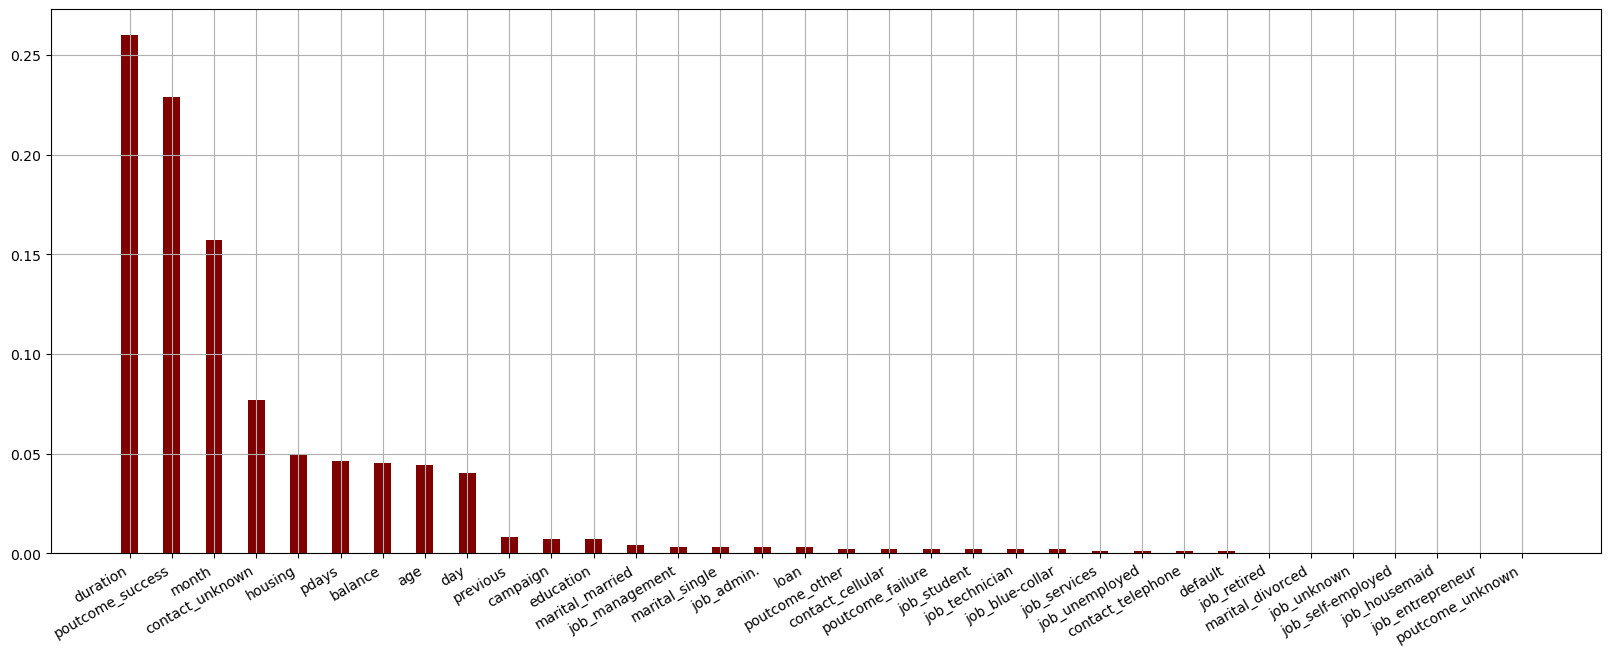

In [192]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate() #to prevent overlapping in x axis labels

plt.bar(importances.feature, importances.importance, color ='maroon',
        width = 0.4)

plt.show()

## Pickling the model file for deployment

In [194]:
import pickle

pickle.dump(best_rf_classifier2,open('bankmodel_v2.pkl','wb'))

In [195]:
pickled_model = pickle.load(open('bankmodel_v2.pkl','rb'))

## Predicting the unseen data

In [196]:
#importing the data

unseen_data = pd.read_csv("C:/Users/Amrita/OneDrive/Desktop/bank_test_unseen.csv",delimiter = ";")

In [197]:
unseen_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,technician,married,tertiary,no,2134,yes,yes,unknown,5,may,261,1,-1,0,unknown,NaN
1,34,management,single,secondary,no,25,yes,no,unknown,6,may,151,1,-1,0,unknown,NaN
2,31,entrepreneur,single,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,NaN


In [198]:
X_test.head(2)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8341,0.615385,0.333333,0.0,0.650275,1.0,0.0,0.366667,0.545455,0.389590,0.2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21244,0.576923,0.000000,0.0,0.391912,0.0,0.0,0.933333,0.363636,0.709779,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Encoding and scaling the unseen the data

In [199]:
one_hot_encoded_test = pd.get_dummies(unseen_data, columns = ['job','marital','contact','poutcome'])

data_encoded_unseen = pd.merge(unseen_data, one_hot_encoded_test, how = "inner")
print(data_encoded_unseen.columns)
data_encoded_unseen.drop(['job','marital','contact','poutcome'], axis=1, inplace=True)
print(data_encoded_unseen.columns)
print(len(data_encoded_unseen.columns))


#Transform non-numeric columns into numerical columns

for column in data_encoded_unseen.columns:
        if data_encoded_unseen[column].dtype == np.number:
            continue
        data_encoded_unseen[column] = LabelEncoder().fit_transform(data_encoded_unseen[column])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_entrepreneur', 'job_management',
       'job_technician', 'marital_married', 'marital_single',
       'contact_unknown', 'poutcome_unknown'],
      dtype='object')
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_entrepreneur', 'job_management', 'job_technician',
       'marital_married', 'marital_single', 'contact_unknown',
       'poutcome_unknown'],
      dtype='object')
20


In [200]:
data_encoded_unseen = data_encoded_unseen[['y','age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous',
       'job_entrepreneur', 'job_management', 'job_technician',
       'marital_married', 'marital_single', 'contact_unknown',
       'poutcome_unknown']]

In [201]:
X = data_encoded_unseen.iloc[:, 1:data_encoded_unseen.shape[1]]
Y = data_encoded_unseen.iloc[:, 0]

In [202]:
X.isnull().sum()

age                 0
education           0
default             0
balance             0
housing             0
loan                0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
job_entrepreneur    0
job_management      0
job_technician      0
marital_married     0
marital_single      0
contact_unknown     0
poutcome_unknown    0
dtype: int64

In [203]:
X_norm_unseen = MinMaxScaler().fit_transform(X.values)
normed_features_df = pd.DataFrame(X_norm_unseen, index=X.index, columns=X.columns)

In [204]:
normed_features_df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous',
       'job_entrepreneur', 'job_management', 'job_technician',
       'marital_married', 'marital_single', 'contact_unknown',
       'poutcome_unknown'],
      dtype='object')

In [205]:
list_n = list(set(X_test.columns) - set(normed_features_df.columns))

## Filling the not present columns with dummy value 0

In [206]:
for i in list_n:
    normed_features_df[i] = 0

In [207]:
print(len(normed_features_df.columns))
print(len(X_test.columns))

34
34


In [208]:
normed_features_df = normed_features_df[X_test.columns]

In [209]:
normed_features_df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1.0,0.0,0,0,0.0,0,0,0,0.0
1,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.5,0.0,...,0,0.0,1.0,0,0,0.0,0,0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,0,0,0.0,0,0,0,0.0


In [210]:
prediction = best_rf_classifier2.predict(normed_features_df)

In [211]:
prediction

array([1, 1, 0])

In [212]:
pickled_model.predict(normed_features_df)

array([1, 1, 0])